# Pasos para el Entrenamiento de un Modelo en TensorFlow

## Instalamos los módulos necesarios

pip install tensorflow

pip install numpy (Este módulo permite realizar cálculos con Python, por lo general viene instalado por defecto)

pip install matplotlib 

## Importar TensorFlow y NumPy

In [9]:
import tensorflow as tf
import numpy as np

## Definir los datos de entrada

In [10]:
celsius = np.array([-40, -10, 0, 8, 15, 22, 38], dtype=float)
fahrenheit= np.array([-40, 14, 32, 46, 59, 72, 100], dtype=float)

###### Le damos ejemplos a la red neuronal de la conversión de Celsius a Fahrenheit

## Crear una Capa en el Modelo

In [11]:
layer = tf.keras.layers.Dense(units=1, input_shape=[1])
model = tf.keras.Sequential([layer])

###### Creamos una capa en el modelo con Dense lo que conectara una a varias unidades
###### pero en este caso solo usamos una de entrada y una de salida asi que la dejamos
###### en 1 y usamos un modelo secuencial.

## Compilar el Modelo

In [12]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.1),
    loss='mean_squared_error'
)

# Entrenar el modelo

In [13]:
print("Starting training...")
history = model.fit(celsius, fahrenheit, epochs=1000, verbose=False)
print("Trained model")

Starting training...
Trained model


## Visualizar la pérdida durante el entrenamiento

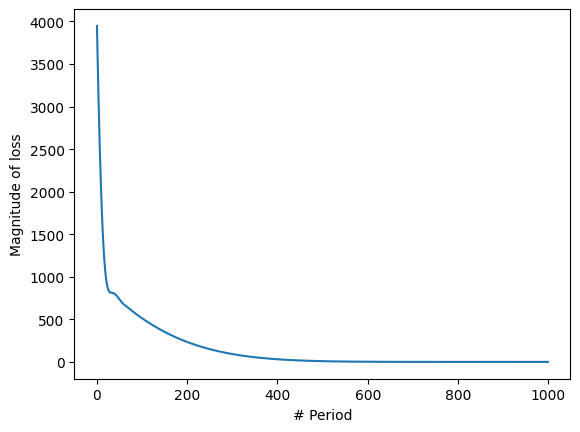

In [14]:
import matplotlib.pyplot as plt
plt.xlabel("# Period")
plt.ylabel("Magnitude of loss")
plt.plot(history.history["loss"])
plt.show()

###### El parendizaje se mantuvo despues de 400 por lo que un periodo de 500 y 600 estaría bien.

## Realizar una predicción

In [15]:
print("Let's make a prediction!")
result = model.predict([100.0])
print("The result is " + str(result) + " Fahrenheit")

Let's make a prediction!


1/1 [==============================] - 0s 60ms/step
The result is [[211.74266]] Fahrenheit


###### La fórmula para transformar Celsius a Fahrenheit es
###### F = C * 1.8 + 32  lo que sería  F = 100 * 1.8 + 32 = 212

In [16]:
print("Internal model variables")
print(layer.get_weights())

Internal model variables
[array([[1.7982342]], dtype=float32), array([31.91923], dtype=float32)]


###### Le dimos de entrada al modelo 100 unidades las cuales son multiplicadas por 1.7984352
###### y después se le suma 31.896553 que nos da 211.74008. La red neuronal creada dedujo la
###### fórmula a su manera dando el mismo resultado el cual es correcto.